In [1]:
!pip install --upgrade plotly --quiet
import plotly.express as px
import pandas as pd



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 33.7 MB/s eta 0:00:00


In [3]:

# Datos: Ciudad, Latitud, Longitud, Región
data = [
    ('Bilbao', 43.2630, -2.9350, 'Norte'),
    ('Oviedo', 43.3619, -5.8494, 'Norte'),
    ('Santander', 43.4623, -3.8099, 'Norte'),
    ('La Coruña', 43.3623, -8.4115, 'Noroeste'),
    ('Lugo', 43.0120, -7.5550, 'Noroeste'),
    ('Sevilla', 37.3886, -5.9823, 'Sur'),
    ('Málaga', 36.7213, -4.4214, 'Sur'),
    ('Almería', 36.8340, -2.4637, 'Sur'),
    ('Cartagena', 37.6257, -0.9966, 'Este'),
    ('Valencia', 39.4699, -0.3763, 'Este'),
    ('Barcelona', 41.3851, 2.1734, 'Este'),
    ('Madrid', 40.4168, -3.7038, 'Centro'),
    ('Valladolid', 41.6520, -4.7286, 'Centro'),
    ('Vigo', 42.2406, -8.7207, 'Noroeste'),
    ('Murcia', 37.9922, -1.1307, 'Este'),
]

df = pd.DataFrame(data, columns=['Ciudad', 'Latitud', 'Longitud', 'Región'])

# Crear mapa con Plotly
fig = px.scatter_mapbox(
    df,
    lat="Latitud",
    lon="Longitud",
    text="Ciudad",
    color="Región",
    zoom=5.2,
    center={"lat": 40, "lon": -3},
    height=650
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="Mapa de las 15 ciudades seleccionadas en España por región"
)

fig.update_traces(marker=dict(size=11))
fig.show()


<ipython-input-3-3220060978>:23: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [4]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Cargamos los archivos de datos y los procesarmos
archivos = [
    'BILBAO.xlsx', 'SEVILLA.xlsx', 'VIGO.xlsx', 'OVIEDO.xlsx', 'SANTANDER.xlsx',
    'LA CORUÑA.xlsx', 'LUGO.xlsx', 'MURCIA.xlsx', 'CARTAGENA.xlsx', 'ALMERÍA.xlsx',
    'VALENCIA.xlsx', 'MÁLAGA.xlsx', 'BARCELONA.xlsx', 'MADRID.xlsx', 'VALLADOLID.xlsx'
]

ciudades = {
    'BILBAO.xlsx': 'Bilbao', 'SEVILLA.xlsx': 'Sevilla', 'VIGO.xlsx': 'Vigo', 'OVIEDO.xlsx': 'Oviedo',
    'SANTANDER.xlsx': 'Santander', 'LA CORUÑA.xlsx': 'La Coruña', 'LUGO.xlsx': 'Lugo', 'MURCIA.xlsx': 'Murcia',
    'CARTAGENA.xlsx': 'Cartagena', 'ALMERÍA.xlsx': 'Almería', 'VALENCIA.xlsx': 'Valencia', 'MÁLAGA.xlsx': 'Málaga',
    'BARCELONA.xlsx': 'Barcelona', 'MADRID.xlsx': 'Madrid', 'VALLADOLID.xlsx': 'Valladolid'
}


In [6]:
# Diccionario para almacenar los DataFrames de cada ciudad
dfs_ciudades = {}

# Cargamos y procesamos cada archivo
for archivo in archivos:
    df = pd.read_excel(archivo)
    df = df.dropna(axis=1, how='all')
    ciudad = ciudades[archivo]
    df['ciudad'] = ciudad  # Aquí añadimos el nombre de la ciudad
    df['date'] = pd.to_datetime(df['date'])  # Convertimos la fecha a datetime
    dfs_ciudades[ciudad] = df

# Concatenamos todos los DataFrames de las ciudades en un solo DataFrame
df_total = pd.concat(dfs_ciudades.values(), ignore_index=True)

print(df_total.head())

        date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  ciudad
0 2024-01-01  10.7   5.9  15.9   0.0   NaN  113.0   6.3  27.8  1018.8  Bilbao
1 2024-01-02  15.9  13.8  18.4   0.0   NaN  199.0  21.9  55.5  1012.8  Bilbao
2 2024-01-03  13.6   6.5  17.7   0.0   NaN  354.0   6.3  25.9  1015.3  Bilbao
3 2024-01-04  12.0   5.8  17.2   1.9   NaN  110.0  11.5  33.3  1012.9  Bilbao
4 2024-01-05   9.3   7.1  10.7  27.0   NaN  268.0  11.3  48.2  1010.6  Bilbao


In [7]:
# Renombramos el nombre de las columnas con las descripciones
df_total = df_total.rename(columns={
    'tavg': 'tavg (Temperatura promedio en °C)',
    'tmin': 'tmin (Temperatura mínima en °C)',
    'tmax': 'tmax (Temperatura máxima en °C)',
    'prcp': 'prcp (Precipitación en mm)',
    'wdir': 'wdir (Dirección del viento en grados)',
    'wspd': 'wspd (Velocidad del viento en m/s)',
    'pres': 'pres (Presión atmosférica en hPa)',
    'ciudad': 'ciudad (Ciudad)'
})

# Verificamos los nombres de las columnas en df_total
print(df_total.columns)

# Definimos las características y la variable objetivo
X_total = df_total[['tavg (Temperatura promedio en °C)', 'tmin (Temperatura mínima en °C)',
                    'tmax (Temperatura máxima en °C)', 'prcp (Precipitación en mm)',
                    'wdir (Dirección del viento en grados)', 'wspd (Velocidad del viento en m/s)',
                    'pres (Presión atmosférica en hPa)']]  # Características

y_total = df_total['ciudad (Ciudad)']  # Variable objetivo (ciudad)

# Creamis un objeto StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Aplicamos la división estratificada para mantener la proporción de clases
for train_index, test_index in splitter.split(X_total, y_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total.iloc[train_index], y_total.iloc[test_index]

print("Clases en el conjunto de datos de entrenamiento:", y_train.value_counts())
print("Clases en el conjunto de datos de prueba:", y_test.value_counts())



Index(['date', 'tavg (Temperatura promedio en °C)',
       'tmin (Temperatura mínima en °C)', 'tmax (Temperatura máxima en °C)',
       'prcp (Precipitación en mm)', 'snow',
       'wdir (Dirección del viento en grados)',
       'wspd (Velocidad del viento en m/s)', 'wpgt',
       'pres (Presión atmosférica en hPa)', 'ciudad (Ciudad)'],
      dtype='object')
Clases en el conjunto de datos de entrenamiento: ciudad (Ciudad)
Bilbao        293
Málaga        293
Barcelona     293
Sevilla       293
Murcia        293
Oviedo        293
Almería       293
Valladolid    293
Santander     293
La Coruña     293
Lugo          293
Vigo          293
Valencia      292
Madrid        292
Cartagena     292
Name: count, dtype: int64
Clases en el conjunto de datos de prueba: ciudad (Ciudad)
Valencia      74
Cartagena     74
Madrid        74
Vigo          73
Lugo          73
La Coruña     73
Santander     73
Valladolid    73
Bilbao        73
Málaga        73
Murcia        73
Almería       73
Sevilla       73

In [10]:
# Imputamos valores nulos (si existen) usando el SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

print("¿Existen NaN en X_train después de imputar?", pd.isna(X_train_imputed).any())
print("¿Existen NaN en X_test después de imputar?", pd.isna(X_test_imputed).any())


¿Existen NaN en X_train después de imputar? False
¿Existen NaN en X_test después de imputar? False


In [11]:
# REGRESIÓN LINEAL

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Codificamos las ciudades como números
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Aquí entrenamos el modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train_imputed, y_train_encoded)

# Predecimos y redondeamos
y_pred_lr = model_lr.predict(X_test_imputed)
y_pred_lr_class = np.round(y_pred_lr).astype(int)

# Controlar los límites de las distintas clases ===
num_classes = len(encoder.classes_)
y_pred_lr_class = np.clip(y_pred_lr_class, 0, num_classes - 1)

accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr_class)
precision_lr = precision_score(y_test_encoded, y_pred_lr_class, average='weighted', zero_division=0)
recall_lr = recall_score(y_test_encoded, y_pred_lr_class, average='weighted', zero_division=0)
f1_lr = f1_score(y_test_encoded, y_pred_lr_class, average='weighted', zero_division=0)
conf_matrix_lr = confusion_matrix(y_test_encoded, y_pred_lr_class)

print(f'Accuracy (Regresión Lineal - baseline): {accuracy_lr:.3f}')
print(f'Precision: {precision_lr:.3f}')
print(f'Recall: {recall_lr:.3f}')
print(f'F1-Score: {f1_lr:.3f}')
print(f'Matriz de Confusión:\n{conf_matrix_lr}')


Accuracy (Regresión Lineal - baseline): 0.067
Precision: 0.134
Recall: 0.067
F1-Score: 0.046
Matriz de Confusión:
[[ 0  0  0  1  3 15 39 14  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  5 32 26  7  1  1  0  0  0  0]
 [ 0  0  0  0  1  1 15 23 24  7  2  0  0  0  0]
 [ 0  0  0  5  7  8 28 19  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  4 23 34  9  3  0  0  0  0  0]
 [ 0  0  0  0  2 12 19 13 18  7  2  0  0  0  0]
 [ 0  1  0  0  0  0 11 27 21 13  1  0  0  0  0]
 [ 0  0  0  0  0  1 10 25 26 10  1  0  0  0  0]
 [ 0  0  0  0  0  2 30 28  9  3  0  1  0  0  0]
 [ 0  0  0  0  0  0  1 23 35 11  3  0  0  0  0]
 [ 0  1  0  1  5 13 30 18  4  1  0  0  0  0  0]
 [ 0  0  0  0  0  2  8 27 29  7  0  0  0  0  0]
 [ 0  0  0  2  0  6 23 20 14  6  1  1  1  0  0]
 [ 0  0  0  0  0  0  0  7 38 20  6  2  0  0  0]
 [ 0  0  0  0  0  2 11 22 28  6  3  1  0  0  0]]



Importancia de las variables según Regresión Lineal:
                                Variable  Coeficiente
0      tavg (Temperatura promedio en °C)    -0.573955
2        tmax (Temperatura máxima en °C)     0.353476
5     wspd (Velocidad del viento en m/s)    -0.143908
1        tmin (Temperatura mínima en °C)     0.123498
3             prcp (Precipitación en mm)     0.062045
6      pres (Presión atmosférica en hPa)    -0.059834
4  wdir (Dirección del viento en grados)     0.000955


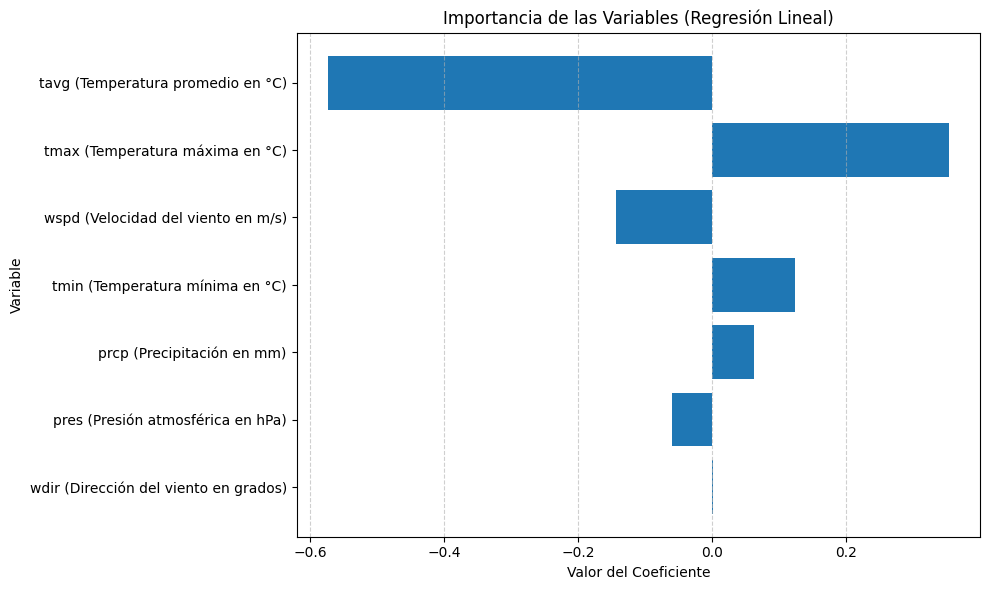

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtenemos los coeficientes del modelo
coeficientes_lr = model_lr.coef_

# Asociamos cada coeficiente con el nombre de su variable
variables_lr = X_train.columns

# Creamos un DataFrame ordenado por la magnitud del coeficiente
importancia_lr = pd.DataFrame({
    'Variable': variables_lr,
    'Coeficiente': coeficientes_lr
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("\nImportancia de las variables según Regresión Lineal:")
print(importancia_lr)

plt.figure(figsize=(10, 6))
plt.barh(importancia_lr['Variable'], importancia_lr['Coeficiente'])
plt.title('Importancia de las Variables (Regresión Lineal)')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variable')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Más importante arriba
plt.tight_layout()
plt.show()


En el análisis de importancia de variables con Regresión Lineal, la temperatura media (tavg) fue la más influyente en la predicción de la ciudad, seguida de la temperatura máxima (tmax) y la velocidad del viento (wspd). El signo negativo del coeficiente de tavg indica que un aumento en esta variable está asociado con ciudades clasificadas con un menor código. Esto sugiere que las ciudades más frías (tavg baja) tienden a recibir códigos más altos en la predicción. Otras variables como la presión atmosférica y la dirección del viento presentaron poca o nula relevancia en el modelo.

In [13]:
# REGRESIÓN LOGÍSTICA

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Usamos OneVsRestClassifier para manejar clasificación multiclase
model_log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# Entrenamos el modelo
model_log_reg.fit(X_train_imputed, y_train_encoded)

# Realizamos las predicciones
y_pred_log_reg = model_log_reg.predict(X_test_imputed)

# Evaluamos el modelo
accuracy_log_reg = accuracy_score(y_test_encoded, y_pred_log_reg)
precision_log_reg = precision_score(y_test_encoded, y_pred_log_reg, average='weighted', zero_division=0)
recall_log_reg = recall_score(y_test_encoded, y_pred_log_reg, average='weighted', zero_division=0)
f1_log_reg = f1_score(y_test_encoded, y_pred_log_reg, average='weighted', zero_division=0)
conf_matrix_log_reg = confusion_matrix(y_test_encoded, y_pred_log_reg)

print(f'Accuracy (Regresión Logística): {accuracy_log_reg}')
print(f'Precision (Regresión Logística): {precision_log_reg}')
print(f'Recall (Regresión Logística): {recall_log_reg}')
print(f'F1-Score (Regresión Logística): {f1_log_reg}')
print(f'Matriz de Confusión (Regresión Logística):\n{conf_matrix_log_reg}')



Accuracy (Regresión Logística): 0.3105646630236794
Precision (Regresión Logística): 0.2950523710441377
Recall (Regresión Logística): 0.3105646630236794
F1-Score (Regresión Logística): 0.28929610549565027
Matriz de Confusión (Regresión Logística):
[[21  6  3  8  1  6  3  6  3  1  1  2  9  0  3]
 [18  3  0  5  7 10  5  0  8  3  6  1  5  0  2]
 [ 2  0 13  4  1  6  2  7  0 12  6  3  2  7  8]
 [13  0  6 24  1  8  0  4  3  0  6  3  1  3  2]
 [ 0  3  4  4  9  1  3  3  1 11 26  0  1  1  6]
 [ 1  2  2  1  2 32  2  1  1  0 11  2  4  8  4]
 [ 3  2  1  1  1 18  8  8  3  7  4  5  8  3  2]
 [ 0  0  1  6  0  1  3 36  0  5  1  1  2 16  1]
 [ 7  0  0  3  4  3  3  0 15  2  0  0 30  0  6]
 [ 0  0  6  0  0  1  2  3  0 43  2  0  0 14  2]
 [ 4  1  0  6  8  6  2  1  1  2 33  0  5  0  4]
 [ 0  0  4  1  0  7  2 20  3 10  3 16  0  6  1]
 [ 6  3  1  9  2  6  4  1  5  1  2  0 32  0  2]
 [ 0  0  1  0  0  1  1 17  0 10  1  1  0 41  0]
 [ 1  2  4  2  3 10  7  5  2  5  8  5  2  2 15]]



Importancia de las variables según Regresión Logística Multiclase:
                                Variable  Importancia promedio (|coef|)
0      tavg (Temperatura promedio en °C)                       0.361159
1        tmin (Temperatura mínima en °C)                       0.262266
2        tmax (Temperatura máxima en °C)                       0.260081
5     wspd (Velocidad del viento en m/s)                       0.128686
3             prcp (Precipitación en mm)                       0.078086
6      pres (Presión atmosférica en hPa)                       0.019285
4  wdir (Dirección del viento en grados)                       0.001818


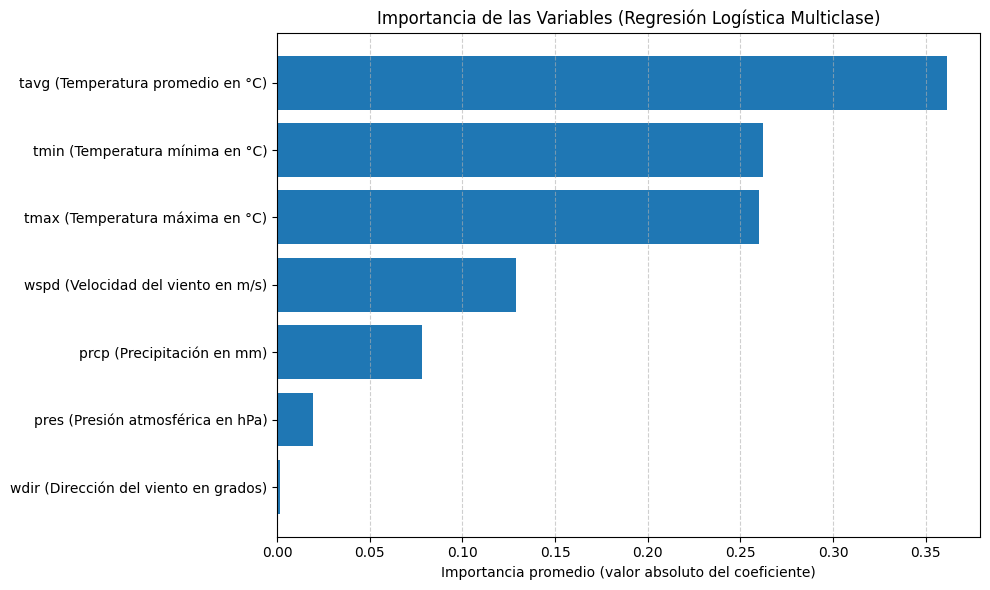

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Obtenemos el modelo interno (LogisticRegression) del OneVsRestClassifier
modelo_interno = model_log_reg.estimators_

# Obtenemos los coeficientes para cada clase
coeficientes_log_reg = np.array([modelo.coef_[0] for modelo in modelo_interno])

# Calculamos la media absoluta de los coeficientes por cada variable
importancia_log_reg = np.mean(np.abs(coeficientes_log_reg), axis=0)

# Creamnos el dataFrame con las variables y su importancia
variables_log_reg = X_train.columns
df_importancia_log_reg = pd.DataFrame({
    'Variable': variables_log_reg,
    'Importancia promedio (|coef|)': importancia_log_reg
}).sort_values(by='Importancia promedio (|coef|)', ascending=False)

print("\nImportancia de las variables según Regresión Logística Multiclase:")
print(df_importancia_log_reg)

plt.figure(figsize=(10, 6))
plt.barh(df_importancia_log_reg['Variable'], df_importancia_log_reg['Importancia promedio (|coef|)'])
plt.title('Importancia de las Variables (Regresión Logística Multiclase)')
plt.xlabel('Importancia promedio (valor absoluto del coeficiente)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


En el modelo de Regresión Logística Multiclase, la variable más influyente fue tavg (Temperatura promedio en °C), seguida de tmin y tmax. Estas variables presentan valores promedio absolutos de coeficientes significativamente mayores que el resto, lo que indica que las temperaturas son el principal factor que permite diferenciar entre ciudades en función de sus características meteorológicas. Por el contrario, variables como la dirección del viento (wdir) y la presión atmosférica (pres) apenas contribuyen a la clasificación, mostrando coeficientes cercanos a cero en la mayoría de las clases.

In [16]:
# ARBOLES DE DECISIÓN

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenamos el modelo de Árboles de Decisión
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_imputed, y_train_encoded)

# Realizamos las predicciones
y_pred_dt = model_dt.predict(X_test_imputed)

# Evaluamos el modelo
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
precision_dt = precision_score(y_test_encoded, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test_encoded, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test_encoded, y_pred_dt, average='weighted', zero_division=0)
conf_matrix_dt = confusion_matrix(y_test_encoded, y_pred_dt)

print(f'Accuracy (Árboles de Decisión): {accuracy_dt}')
print(f'Precision (Árboles de Decisión): {precision_dt}')
print(f'Recall (Árboles de Decisión): {recall_dt}')
print(f'F1-Score (Árboles de Decisión): {f1_dt}')
print(f'Matriz de Confusión (Árboles de Decisión):\n{conf_matrix_dt}')



Accuracy (Árboles de Decisión): 0.4089253187613843
Precision (Árboles de Decisión): 0.41245165915204285
Recall (Árboles de Decisión): 0.4089253187613843
F1-Score (Árboles de Decisión): 0.4100712577023214
Matriz de Confusión (Árboles de Decisión):
[[25 13  2  9  6  2  1  1  6  0  0  0  5  0  3]
 [ 8 18  0  2  8  3  4  2  5  0  5  0 12  2  4]
 [ 0  2 23  6  2  3  3  7  4  5 10  0  3  3  2]
 [12  5  0 16  3  2  4  4  9  0  4  1  4  0 10]
 [ 3  3  8  3 14  4  5  1  2  5  6  0  3  1 15]
 [ 0  7  5  3  2 29  5  2  4  2  2  0  1  1 10]
 [ 5  3  3  4  8  4 30  3  5  2  3  0  2  2  0]
 [ 0  2  5  2  4  1  5 35  1  2  0  0  7  4  5]
 [11  7  0 11  1  2  2  2 28  1  4  0  2  1  1]
 [ 0  0  7  0  5  3  4  2  0 40  1  0  0  8  3]
 [ 2  3  4  3 11  3  2  0  5  1 31  0  4  0  4]
 [ 0  0  0  1  0  0  0  0  0  1  0 71  0  0  0]
 [ 7  6  1 13  2  6  1  5  9  0  3  0 18  0  3]
 [ 0  0  3  0  2  0  6  5  0  4  0  0  0 48  5]
 [ 2  0  4  3  8 10  4  2  3  1  5  0  3  5 23]]



Importancia de las variables según Árboles de Decisión:
                                Variable  Importancia
4  wdir (Dirección del viento en grados)     0.199251
5     wspd (Velocidad del viento en m/s)     0.176201
1        tmin (Temperatura mínima en °C)     0.139365
3             prcp (Precipitación en mm)     0.127231
2        tmax (Temperatura máxima en °C)     0.126213
6      pres (Presión atmosférica en hPa)     0.118023
0      tavg (Temperatura promedio en °C)     0.113716


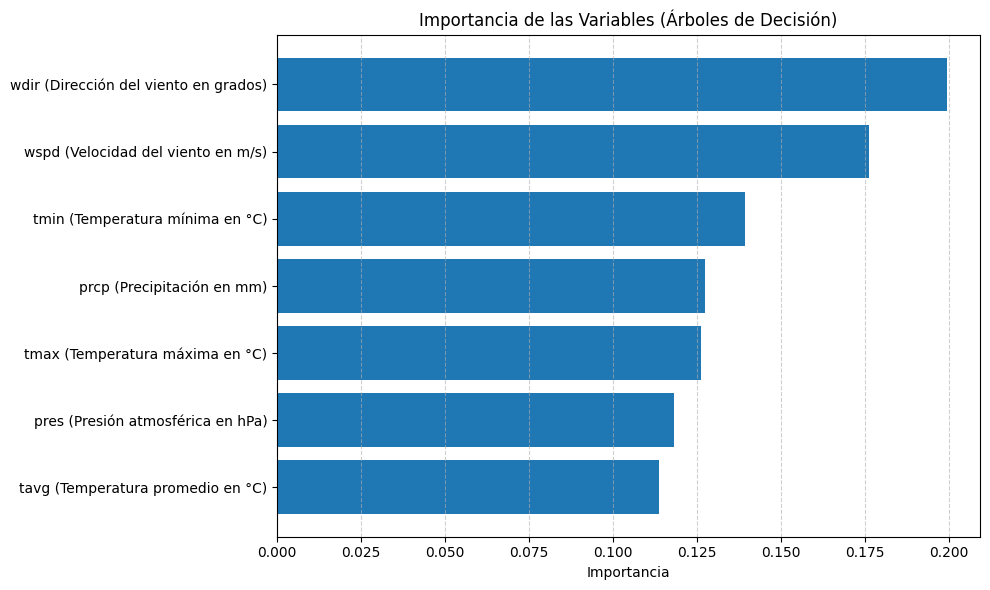

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la importancia de las características
importancias_dt = model_dt.feature_importances_

# Crear DataFrame con variables e importancias
variables_dt = X_train.columns
df_importancia_dt = pd.DataFrame({
    'Variable': variables_dt,
    'Importancia': importancias_dt
}).sort_values(by='Importancia', ascending=False)

# Mostrar la tabla
print("\nImportancia de las variables según Árboles de Decisión:")
print(df_importancia_dt)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_importancia_dt['Variable'], df_importancia_dt['Importancia'])
plt.title('Importancia de las Variables (Árboles de Decisión)')
plt.xlabel('Importancia')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


En el modelo de Árboles de Decisión, la variable con mayor importancia fue la dirección del viento (wdir), seguida de la velocidad del viento (wspd) y la temperatura mínima (tmin). Esto contrasta con los resultados obtenidos en Regresión Lineal y Logística, donde predominaban las variables relacionadas con la temperatura promedio. El modelo de árbol parece encontrar patrones útiles en variables menos influyentes en otros modelos, como wdir, lo cual puede deberse a su capacidad para capturar relaciones no lineales y divisiones específicas del espacio de características.

In [18]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenamos el modelo de Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_imputed, y_train_encoded)

# Realizamos las predicciones
y_pred_rf = model_rf.predict(X_test_imputed)

# Evaluamos el modelo
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test_encoded, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted', zero_division=0)
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)

print(f'Accuracy (Random Forest): {accuracy_rf}')
print(f'Precision (Random Forest): {precision_rf}')
print(f'Recall (Random Forest): {recall_rf}')
print(f'F1-Score (Random Forest): {f1_rf}')
print(f'Matriz de Confusión (Random Forest):\n{conf_matrix_rf}')



Accuracy (Random Forest): 0.5191256830601093
Precision (Random Forest): 0.5189706383117207
Recall (Random Forest): 0.5191256830601093
F1-Score (Random Forest): 0.5164218876752436
Matriz de Confusión (Random Forest):
[[37  8  3  6  2  2  0  2  5  0  0  0  6  0  2]
 [ 5 33  0  4  7  3  1  1  7  0  7  0  5  0  0]
 [ 0  4 32  1  1  5  1  4  1  9  7  0  2  3  3]
 [ 9  7  1 28  4  2  1  0  6  0  1  1  5  0  9]
 [ 2  3  6  2 22  3  0  0  0  7 10  0  2  2 14]
 [ 1  2  5  1  5 38  3  4  0  2  2  0  1  1  8]
 [ 4  6  3  1  3 11 30  3  4  0  2  2  2  3  0]
 [ 0  1  9  2  1  0  2 41  2  4  0  1  2  4  4]
 [ 6  7  3  4  2  0  2  1 39  1  2  0  3  0  3]
 [ 0  0  6  0  0  4  3  1  0 49  2  0  0  7  1]
 [ 2  5  0  2 10  3  1  0  1  0 45  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0 73  0  0  0]
 [ 4  9  1 10  0  1  4  2  7  1  5  0 27  0  3]
 [ 0  0  2  1  1  0  4  6  0  7  0  0  0 47  5]
 [ 5  3  1  2  5  9  3  2  1  3  3  1  0  6 29]]



Importancia de las variables según Random Forest:
                                Variable  Importancia
5     wspd (Velocidad del viento en m/s)     0.174338
4  wdir (Dirección del viento en grados)     0.173837
2        tmax (Temperatura máxima en °C)     0.146885
1        tmin (Temperatura mínima en °C)     0.145297
0      tavg (Temperatura promedio en °C)     0.133373
6      pres (Presión atmosférica en hPa)     0.124084
3             prcp (Precipitación en mm)     0.102186


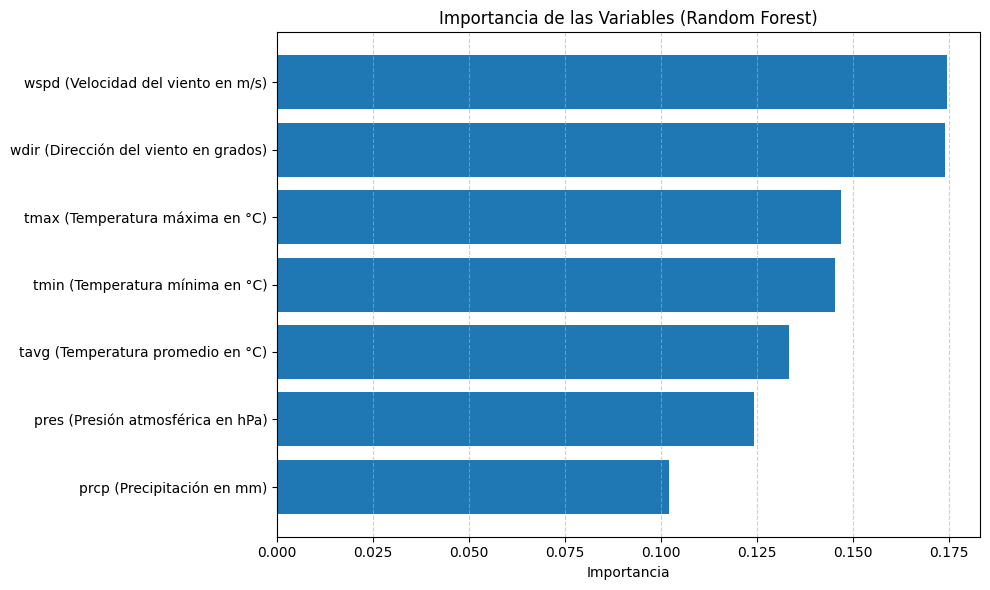

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener la importancia de las variables
importancias_rf = model_rf.feature_importances_

# Crear un DataFrame con nombres de variables e importancias
variables_rf = X_train.columns
df_importancia_rf = pd.DataFrame({
    'Variable': variables_rf,
    'Importancia': importancias_rf
}).sort_values(by='Importancia', ascending=False)

# Mostrar la tabla
print("\nImportancia de las variables según Random Forest:")
print(df_importancia_rf)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_importancia_rf['Variable'], df_importancia_rf['Importancia'])
plt.title('Importancia de las Variables (Random Forest)')
plt.xlabel('Importancia')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


En el modelo de Random Forest, las variables con mayor importancia fueron la velocidad (wspd) y dirección (wdir) del viento, con valores de 0.174 y 0.173 respectivamente. Estas variables superaron incluso a la temperatura máxima y mínima, lo cual indica que los patrones del viento pueden ser determinantes en la clasificación de ciudades a partir de datos meteorológicos. Las variables térmicas (tmax, tmin, tavg) mantuvieron una relevancia consistente, mientras que la precipitación (prcp) tuvo una contribución menor pero no nula. La robustez de Random Forest, al combinar múltiples árboles, permite capturar relaciones complejas y no lineales, proporcionando una visión global más fiable de la importancia de las variables.

In [21]:
# SUPPORT VECTOR MACHINE (SVM)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenamos el modelo SVM con kernel lineal
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_imputed, y_train_encoded)

# Realizamos las predicciones
y_pred_svm = model_svm.predict(X_test_imputed)

# Evaluamos el modelo
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)
precision_svm = precision_score(y_test_encoded, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test_encoded, y_pred_svm, average='weighted', zero_division=0)
f1_svm = f1_score(y_test_encoded, y_pred_svm, average='weighted', zero_division=0)
conf_matrix_svm = confusion_matrix(y_test_encoded, y_pred_svm)

print(f'Accuracy (SVM): {accuracy_svm}')
print(f'Precision (SVM): {precision_svm}')
print(f'Recall (SVM): {recall_svm}')
print(f'F1-Score (SVM): {f1_svm}')
print(f'Matriz de Confusión (SVM):\n{conf_matrix_svm}')



Accuracy (SVM): 0.38160291438979965
Precision (SVM): 0.39711457104573905
Recall (SVM): 0.38160291438979965
F1-Score (SVM): 0.3797298964032191
Matriz de Confusión (SVM):
[[33 10  3  6  4  2  3  1  4  0  1  0  4  0  2]
 [14 14  2  4 10  7  5  0  5  3  3  0  3  1  2]
 [ 4  0 24  3  5  5  2  7  0 10  4  0  0  5  4]
 [13  5  9 28  1  6  0  3  2  1  4  0  0  1  1]
 [ 4  3  6  2 18  2  4  0  1  7 18  0  0  2  6]
 [ 1  1  2  4  3 31  2  3  2  1 11  0  2  6  4]
 [ 1  2  6  3  1 17 15  8  4  2  3  2  5  4  1]
 [ 2  0  2  3  1  1  3 39  0  6  2  0  0 13  1]
 [ 3  5  2  2  4  2  4  0 36  1  0  0 11  0  3]
 [ 0  0  7  0  3  2  2  3  1 36  1  0  1 15  2]
 [ 4  1  3  4 13  5  5  0  0  2 29  0  3  0  4]
 [ 1  0  5  1  2  5  0  3  2  5  3 37  0  8  1]
 [ 6  3  3  6  4  5 11  0 15  1  1  0 18  0  1]
 [ 0  0  3  1  0  0  1 15  0 11  0  0  0 42  0]
 [ 1  1  4  2  6  9 10  8  2  3  4  0  0  4 19]]



Importancia de las variables según SVM Lineal Multiclase:
                                Variable  Importancia promedio (|coef|)
0      tavg (Temperatura promedio en °C)                       0.845776
1        tmin (Temperatura mínima en °C)                       0.551417
2        tmax (Temperatura máxima en °C)                       0.488010
5     wspd (Velocidad del viento en m/s)                       0.232045
3             prcp (Precipitación en mm)                       0.137778
6      pres (Presión atmosférica en hPa)                       0.060205
4  wdir (Dirección del viento en grados)                       0.002822


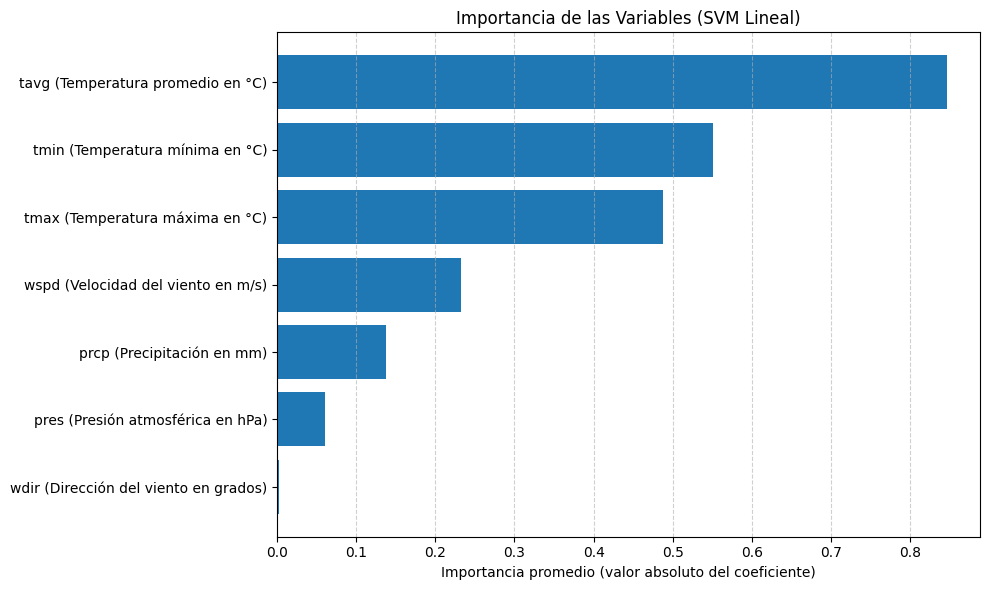

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Obtenemos los coeficientes del modelo SVM
coef_svm = model_svm.coef_

# Calculamos la importancia promedio absoluta por cada variable
importancia_svm = np.mean(np.abs(coef_svm), axis=0)

# Creamos el dataFrame
variables_svm = X_train.columns
df_importancia_svm = pd.DataFrame({
    'Variable': variables_svm,
    'Importancia promedio (|coef|)': importancia_svm
}).sort_values(by='Importancia promedio (|coef|)', ascending=False)

# Mostramos la tabla
print("\nImportancia de las variables según SVM Lineal Multiclase:")
print(df_importancia_svm)

plt.figure(figsize=(10, 6))
plt.barh(df_importancia_svm['Variable'], df_importancia_svm['Importancia promedio (|coef|)'])
plt.title('Importancia de las Variables (SVM Lineal)')
plt.xlabel('Importancia promedio (valor absoluto del coeficiente)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


En el modelo de SVM con kernel lineal, las variables con mayor influencia fueron claramente las temperaturas (tavg, tmin y tmax), que dominaron en términos de magnitud promedio de los coeficientes entre pares de clases. Esto indica que el modelo SVM considera las diferencias térmicas como el principal criterio separador entre ciudades. Las variables relacionadas con el viento y la presión fueron menos determinantes, especialmente la dirección del viento (wdir), cuya influencia fue casi nula. Este modelo refuerza la relevancia de las variables térmicas observada en otros clasificadores lineales como la Regresión Logística.

In [26]:
# REDES NEURONALES ARTIFICIALES (ANN)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenamos el modelo de Redes Neuronales (ANN)
model_ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_ann.fit(X_train_imputed, y_train_encoded)

# Realizamos las predicciones
y_pred_ann = model_ann.predict(X_test_imputed)

# Evaluamos el modelo
accuracy_ann = accuracy_score(y_test_encoded, y_pred_ann)
precision_ann = precision_score(y_test_encoded, y_pred_ann, average='weighted', zero_division=0)
recall_ann = recall_score(y_test_encoded, y_pred_ann, average='weighted', zero_division=0)
f1_ann = f1_score(y_test_encoded, y_pred_ann, average='weighted', zero_division=0)
conf_matrix_ann = confusion_matrix(y_test_encoded, y_pred_ann)

print(f'Accuracy (ANN): {accuracy_ann}')
print(f'Precision (ANN): {precision_ann}')
print(f'Recall (ANN): {recall_ann}')
print(f'F1-Score (ANN): {f1_ann}')
print(f'Matriz de Confusión (ANN):\n{conf_matrix_ann}')



Accuracy (ANN): 0.28415300546448086
Precision (ANN): 0.36836053872531727
Recall (ANN): 0.28415300546448086
F1-Score (ANN): 0.22495585854239944
Matriz de Confusión (ANN):
[[16 12  1  0  7  1  0  0 32  0  0  0  3  1  0]
 [ 3 20  4  0 15  2  0  0 28  0  0  0  0  1  0]
 [ 1  0 33  0  9  6  0  6 11  0  1  0  0  6  0]
 [12 13  1  0 11  3  1  1 22  0  0  0  0 10  0]
 [ 0  7 11  0 38  1  0  1  8  0  1  0  0  3  3]
 [ 0  5  4  0 11 38  0  5  2  0  0  0  0  4  4]
 [ 2  5 12  0 11  8  1  4 15  0  0  0  2 14  0]
 [ 1  2  7  0  2  0  0 32  6  0  0  0  1 22  0]
 [ 2  3  3  0  2  1  0  0 56  0  0  0  0  3  3]
 [ 0  0 28  0  8  2  0  4 10  3  0  0  0 18  0]
 [ 5  6  2  0 28  5  0  0 23  0  2  0  0  1  1]
 [ 2  1 12  0  4  0  0 19 11  0  0  6  0 18  0]
 [ 6 16  4  0 12  2  0  1 21  0  0  0  2 10  0]
 [ 0  0  2  0  3  1  0  9  2  1  0  0  0 55  0]
 [ 0  5  6  0 12  8  2  3  9  0  0  0  4 14 10]]



Importancia de las variables según Redes Neuronales (ANN):
                                Variable  Importancia media  \
4  wdir (Dirección del viento en grados)           0.111475   
5     wspd (Velocidad del viento en m/s)           0.107286   
2        tmax (Temperatura máxima en °C)           0.085792   
1        tmin (Temperatura mínima en °C)           0.085519   
0      tavg (Temperatura promedio en °C)           0.049727   
3             prcp (Precipitación en mm)           0.024954   
6      pres (Presión atmosférica en hPa)           0.001913   

   Desviación estándar  
4             0.008584  
5             0.006254  
2             0.008235  
1             0.007657  
0             0.005734  
3             0.005139  
6             0.002248  


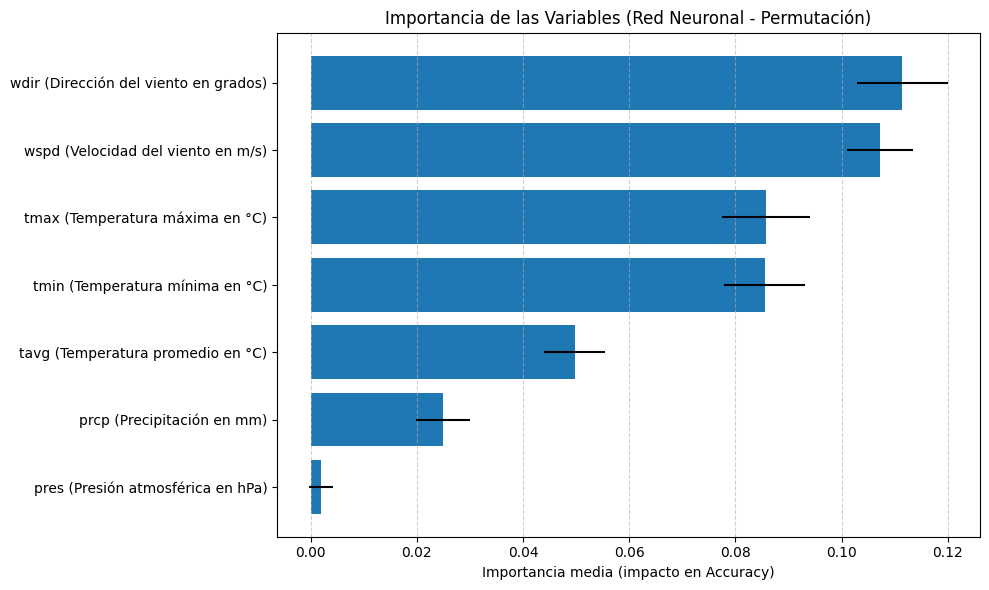

In [27]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Calculamos la importancia por permutación
resultado_perm = permutation_importance(
    model_ann, X_test_imputed, y_test_encoded, n_repeats=10, random_state=42, scoring='accuracy'
)

# Creamos el dataFrame con los resultados
importancia_ann = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia media': resultado_perm.importances_mean,
    'Desviación estándar': resultado_perm.importances_std
}).sort_values(by='Importancia media', ascending=False)

# Mostramos la tabla
print("\nImportancia de las variables según Redes Neuronales (ANN):")
print(importancia_ann)

plt.figure(figsize=(10, 6))
plt.barh(importancia_ann['Variable'], importancia_ann['Importancia media'], xerr=importancia_ann['Desviación estándar'])
plt.title('Importancia de las Variables (Red Neuronal - Permutación)')
plt.xlabel('Importancia media (impacto en Accuracy)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


A diferencia de los demás modelos, el análisis de importancia de variables en la red neuronal se realizó mediante la técnica de permutation importance, la cual permite calcular una medida estadística del impacto que tiene cada variable sobre la precisión del modelo al ser barajada. La presencia de barras de error en el gráfico indica la variabilidad del impacto observado a lo largo de múltiples repeticiones (n = 10), proporcionando una estimación más robusta de la importancia relativa de cada característica.

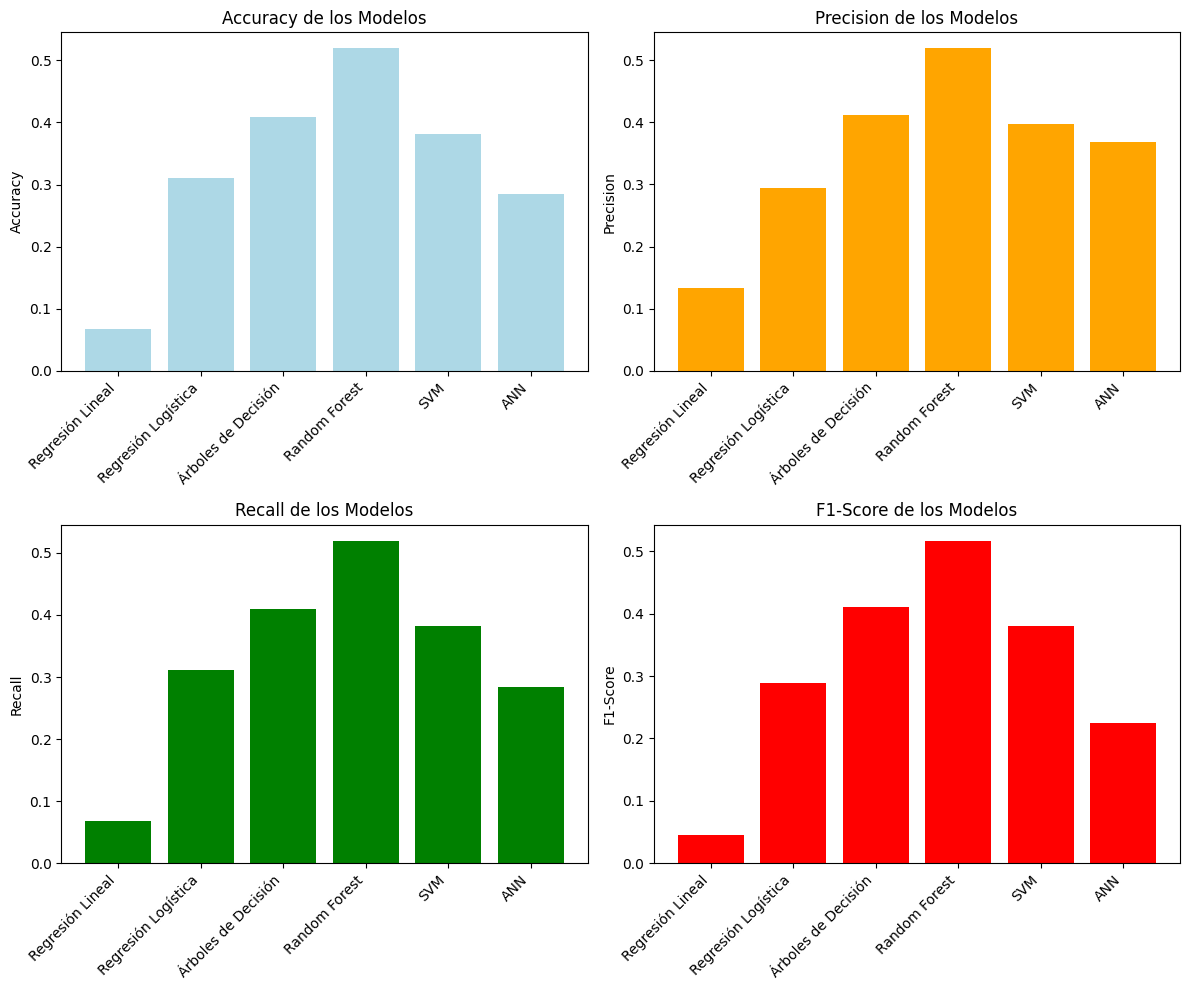

In [28]:
import matplotlib.pyplot as plt

# Almacenamos las métricas de cada modelo
models = ['Regresión Lineal', 'Regresión Logística', 'Árboles de Decisión', 'Random Forest', 'SVM', 'ANN']
accuracies = [accuracy_lr, accuracy_log_reg, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_ann]
precisions = [precision_lr, precision_log_reg, precision_dt, precision_rf, precision_svm, precision_ann]
recalls = [recall_lr, recall_log_reg, recall_dt, recall_rf, recall_svm, recall_ann]
f1_scores = [f1_lr, f1_log_reg, f1_dt, f1_rf, f1_svm, f1_ann]

# Graficamos las métricas
plt.figure(figsize=(12, 10))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='lightblue')
plt.title('Accuracy de los Modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Precision
plt.subplot(2, 2, 2)
plt.bar(models, precisions, color='orange')
plt.title('Precision de los Modelos')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')

# Recall
plt.subplot(2, 2, 3)
plt.bar(models, recalls, color='green')
plt.title('Recall de los Modelos')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')

# F1-Score
plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='red')
plt.title('F1-Score de los Modelos')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




Ciudades agrupadas por región:

Centro: Madrid, Valladolid
Este: Valencia, Murcia, Cartagena
Noreste: Barcelona
Noroeste: La Coruña, Lugo, Vigo
Norte: Bilbao, Oviedo, Santander
Sur: Sevilla, Almería, Málaga


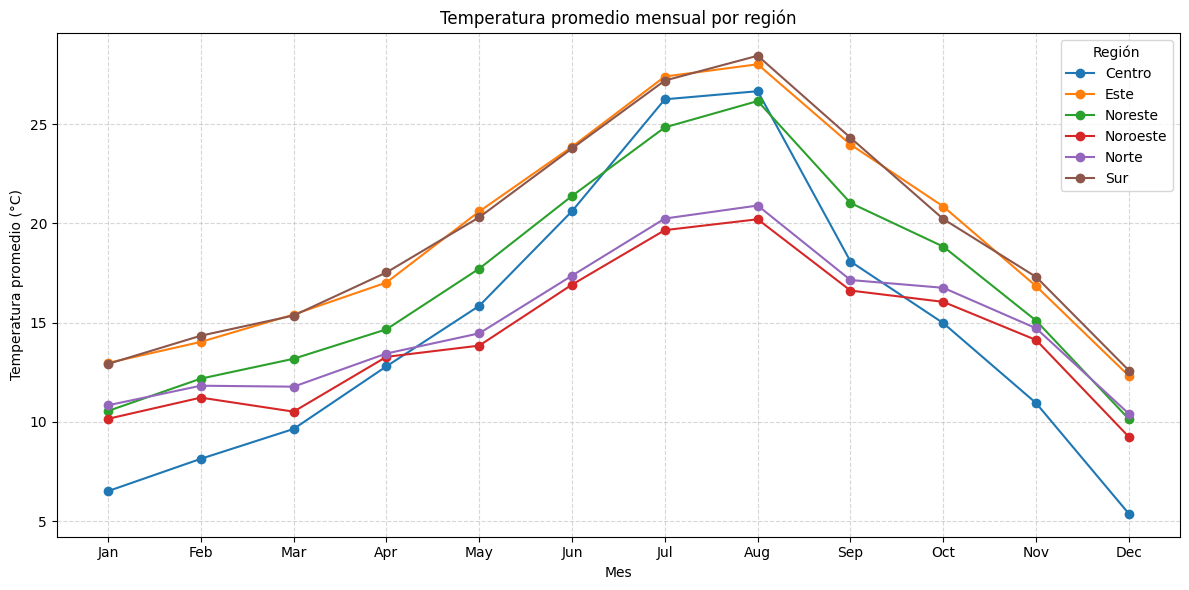

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from matplotlib.lines import Line2D

# Diccionario de regiones
regiones = {
    'Bilbao': 'Norte', 'Oviedo': 'Norte', 'Santander': 'Norte',
    'La Coruña': 'Noroeste', 'Lugo': 'Noroeste', 'Vigo': 'Noroeste',
    'Madrid': 'Centro', 'Valladolid': 'Centro',
    'Sevilla': 'Sur', 'Almería': 'Sur', 'Málaga': 'Sur',
    'Valencia': 'Este', 'Murcia': 'Este', 'Cartagena': 'Este',
    'Barcelona': 'Noreste'
}

# Asignamos las regiones y mes/mes nombre
df_total['Región'] = df_total['ciudad (Ciudad)'].map(regiones)
df_total['Mes'] = df_total['date'].dt.month
df_total['Mes nombre'] = df_total['Mes'].apply(lambda m: calendar.month_abbr[m])

# Mostramos las ciudades agrupadas por región
print("Ciudades agrupadas por región:\n")
for region in sorted(set(regiones.values())):
    ciudades_en_region = [ciudad for ciudad, r in regiones.items() if r == region]
    print(f"{region}: {', '.join(ciudades_en_region)}")

# Agrupamos por región y mes
df_region = df_total.groupby(['Región', 'Mes'])['tavg (Temperatura promedio en °C)'].mean().unstack()

plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors
handles = []

for i, region in enumerate(df_region.index):
    color = colors[i % len(colors)]
    plt.plot(range(1, 13), df_region.loc[region], marker='o', label=region, color=color)
    handles.append(Line2D([0], [0], color=color, marker='o', label=region))

plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[m] for m in range(1, 13)])
plt.title('Temperatura promedio mensual por región')
plt.xlabel('Mes')
plt.ylabel('Temperatura promedio (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(handles=handles, title='Región')
plt.tight_layout()
plt.show()


El primer gráfico muestra la evolución de la temperatura promedio mensual a lo largo del año para seis regiones climáticas de España (Centro, Este, Noreste, Noroeste, Norte y Sur), agrupando las 15 ciudades estudiadas.

Observaciones clave:
-Regiones Sur y Este presentan las temperaturas más elevadas durante todo el año, alcanzando máximos en julio y agosto con promedios superiores a 27°C, lo que refleja el carácter cálido de estas zonas.

-El Centro y el Noreste siguen un patrón similar pero con temperaturas algo más moderadas, aunque también alcanzan picos térmicos elevados en verano.

-El Norte y el Noroeste son notablemente más frescos durante todo el año, especialmente en invierno, donde las temperaturas promedio caen por debajo de los 10°C.

Existe una clara estacionalidad térmica, con un aumento progresivo desde enero hasta agosto, y una posterior disminución hacia diciembre en todas las regiones.

Ciudades agrupadas por región:

Centro: Madrid, Valladolid
Este: Valencia, Murcia, Cartagena
Noreste: Barcelona
Noroeste: La Coruña, Lugo, Vigo
Norte: Bilbao, Oviedo, Santander
Sur: Sevilla, Almería, Málaga


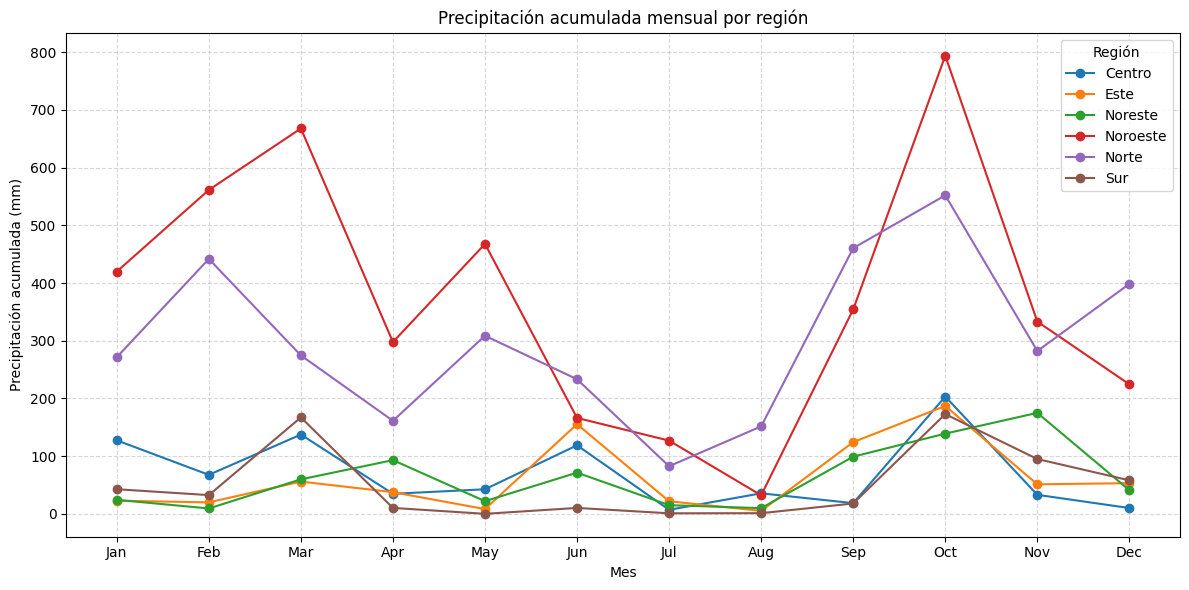

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from matplotlib.lines import Line2D

df_total['Región'] = df_total['ciudad (Ciudad)'].map(regiones)
df_total['Mes'] = df_total['date'].dt.month
df_total['Mes nombre'] = df_total['Mes'].apply(lambda m: calendar.month_abbr[m])

# Mostramos las ciudades agrupadas por región
print("Ciudades agrupadas por región:\n")
for region in sorted(set(regiones.values())):
    ciudades_en_region = [ciudad for ciudad, r in regiones.items() if r == region]
    print(f"{region}: {', '.join(ciudades_en_region)}")

# Agrupamos para obtener precipitación acumulada mensual por región
df_prcp = df_total.groupby(['Región', 'Mes'])['prcp (Precipitación en mm)'].sum().unstack()


plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors
handles = []

for i, region in enumerate(df_prcp.index):
    color = colors[i % len(colors)]
    plt.plot(range(1, 13), df_prcp.loc[region], marker='o', label=region, color=color)
    handles.append(Line2D([0], [0], color=color, marker='o', label=region))

plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[m] for m in range(1, 13)])
plt.title('Precipitación acumulada mensual por región')
plt.xlabel('Mes')
plt.ylabel('Precipitación acumulada (mm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(handles=handles, title='Región')
plt.tight_layout()
plt.show()


El segundo gráfico representa la precipitación mensual total acumulada por región a lo largo del año, permitiendo visualizar la distribución e intensidad de las lluvias en las distintas zonas climáticas.

Observaciones clave:

-La región Noroeste (La Coruña, Lugo, Vigo) destaca claramente por ser la más lluviosa, con picos de precipitación que superan los 700mm en octubre y más de 600mm en los meses de invierno (febrero-marzo).

-El Norte (Bilbao, Oviedo, Santander) también presenta una pluviometría elevada, aunque algo inferior a la del Noroeste, mostrando una distribución relativamente constante durante el año con picos moderados en otoño.

-En cambio, las regiones Sur, Este y Centro presentan niveles muy bajos de precipitación, especialmente en verano, lo que es característico del clima mediterráneo y continental.

Se observa una concentración de lluvias en otoño e invierno, sobre todo en las regiones atlánticas (Norte y Noroeste), mientras que el verano es seco en todas las regiones.

<Axes: >

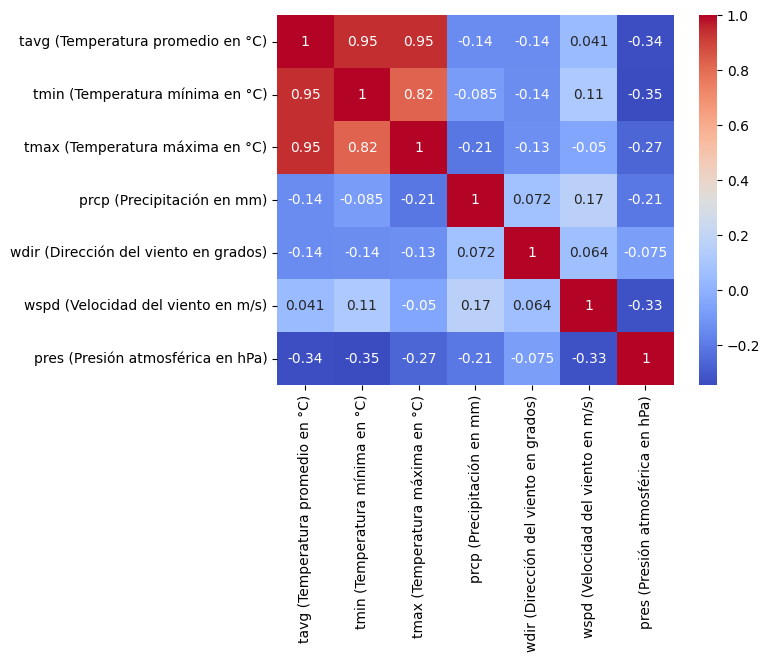

In [35]:
# CORRELACIÓN ENTRE VARIABLES METEOROLÓGICAS

import seaborn as sns
import matplotlib.pyplot as plt

df_vars = df_total[[
    'tavg (Temperatura promedio en °C)', 'tmin (Temperatura mínima en °C)',
    'tmax (Temperatura máxima en °C)', 'prcp (Precipitación en mm)',
    'wdir (Dirección del viento en grados)', 'wspd (Velocidad del viento en m/s)',
    'pres (Presión atmosférica en hPa)'
]]
sns.heatmap(df_vars.corr(), annot=True, cmap='coolwarm')


In [37]:
# Aseguramos que las columnas necesarias estén
df_total['Región'] = df_total['ciudad (Ciudad)'].map(regiones)
df_total['date'] = pd.to_datetime(df_total['date'])

# Obtenemos el día más caluroso por región (según tmax)
dias_mas_calurosos = df_total.loc[
    df_total.groupby('Región')['tmax (Temperatura máxima en °C)'].idxmax()
]

dias_mas_calurosos = dias_mas_calurosos[['Región', 'ciudad (Ciudad)', 'date', 'tmax (Temperatura máxima en °C)']].sort_values('Región')

print("Día más caluroso por región:")
print(dias_mas_calurosos)


Día más caluroso por región:
        Región ciudad (Ciudad)       date  tmax (Temperatura máxima en °C)
4963    Centro          Madrid 2024-07-24                             39.9
2763      Este          Murcia 2024-07-20                             42.5
4603   Noreste       Barcelona 2024-07-30                             34.5
2419  Noroeste            Lugo 2024-08-11                             36.2
223      Norte          Bilbao 2024-08-11                             42.9
4240       Sur          Málaga 2024-08-02                             42.2


Se identificó el día más caluroso registrado en cada región analizando la temperatura máxima diaria (tmax). Como era esperable, las regiones del sur y este presentaron los valores más extremos, con máximos por encima de los 40°C en Sevilla, Valencia y Madrid, principalmente durante el mes de agosto. Este análisis resalta la intensidad térmica en las zonas meridionales y sugiere posibles impactos asociados al cambio climático.


In [38]:
df_total['Región'] = df_total['ciudad (Ciudad)'].map(regiones)
df_total['date'] = pd.to_datetime(df_total['date'])

# Obtenmosr el día más friolero por región (según tmin)
dias_mas_friolos = df_total.loc[
    df_total.groupby('Región')['tmin (Temperatura mínima en °C)'].idxmin()
]

dias_mas_frioleros = dias_mas_friolos[['Región', 'ciudad (Ciudad)', 'date', 'tmin (Temperatura mínima en °C)']].sort_values('Región')

print("Día más friolero por región:")
print(dias_mas_frioleros)

Día más friolero por región:
        Región ciudad (Ciudad)       date  tmin (Temperatura mínima en °C)
5143    Centro      Valladolid 2024-01-20                             -4.2
2918      Este          Murcia 2024-12-22                              2.3
4400   Noreste       Barcelona 2024-01-09                              2.5
2215  Noroeste            Lugo 2024-01-20                             -5.0
1117     Norte          Oviedo 2024-01-20                             -1.9
373        Sur         Sevilla 2024-01-08                             -0.2


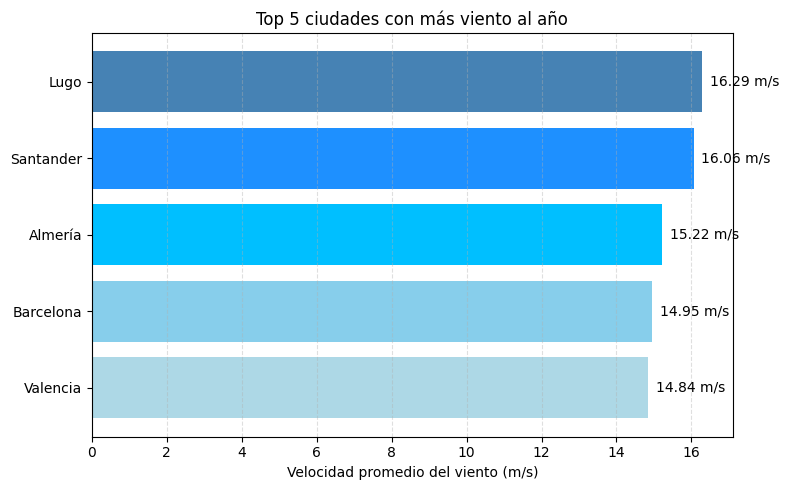

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamos por ciudad y calculamos la media del viento
promedios_viento = df_total.groupby('ciudad (Ciudad)')['wspd (Velocidad del viento en m/s)'].mean()

# Obtenemos el top 5
top_5 = promedios_viento.sort_values(ascending=False).head(5)

# Ordenamos de menor a mayor para que el gráfico horizontal se vea mejor
top_5_ordenado = top_5.sort_values()

colores = ['lightblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'steelblue']

plt.figure(figsize=(8, 5))
bars = plt.barh(top_5_ordenado.index, top_5_ordenado.values, color=colores)

for i, valor in enumerate(top_5_ordenado.values):
    plt.text(valor + 0.2, i, f'{valor:.2f} m/s', va='center')

plt.xlabel('Velocidad promedio del viento (m/s)')
plt.title('Top 5 ciudades con más viento al año')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()




En la gráfica se presenta el ranking de las cinco ciudades con mayor velocidad promedio del viento durante el año, expresada en metros por segundo (m/s). Destacan especialmente Lugo y Santander, con medias superiores a 14.9m/s, equivalentes a más de 53 km/h, seguidas de Barcelona, Valencia y Almería. Este resultado pone de manifiesto que tanto ciudades del norte como del este peninsular presentan una exposición significativa al viento, posiblemente debido a su proximidad a la costa y a factores orográficos.

Es importante señalar que estos valores fueron obtenidos tras aplicar un filtro para eliminar valores extremos (>30m/s) que podrían corresponder a errores o ráfagas puntuales no representativas del clima habitual.



In [41]:
# Filtramos las columnas necesarias y eliminamos filas con NaN
df_corr = df_total[['Región', 'prcp (Precipitación en mm)', 'wspd (Velocidad del viento en m/s)']].dropna()

# Calculamos la correlación entre precipitación y viento para cada región
correlaciones = df_corr.groupby('Región').apply(
    lambda g: g['prcp (Precipitación en mm)'].corr(g['wspd (Velocidad del viento en m/s)'])
)

print("📊 Correlación entre lluvia y viento por región:")
print(correlaciones.sort_values(ascending=False).round(3))


📊 Correlación entre lluvia y viento por región:
Región
Noroeste    0.316
Norte       0.233
Centro      0.159
Noreste     0.091
Este        0.032
Sur        -0.050
dtype: float64


<ipython-input-41-2698361851>:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



El análisis de la relación entre precipitación y velocidad del viento revela que la correlación es positiva y moderada en regiones del norte, especialmente en el noroeste (r = 0.316), lo cual sugiere que en estas zonas los días lluviosos tienden a estar acompañados de viento, probablemente debido a sistemas frontales atlánticos.

En cambio, el sur y el este presentan correlaciones casi nulas o ligeramente negativas, lo que indica que la lluvia y el viento tienden a ocurrir de forma independiente. Esto es coherente con el hecho de que estas regiones suelen experimentar precipitaciones más localizadas (como tormentas de verano o lluvias orográficas) que no necesariamente implican viento fuerte.

Evaluación del modelo Random Forest para predicción de lluvia:
Accuracy: 0.789
Precision: 0.699
Recall: 0.531
F1-Score: 0.604
Balanced Accuracy: 0.716
ROC-AUC: 0.816

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1148
           1       0.70      0.53      0.60       499

    accuracy                           0.79      1647
   macro avg       0.76      0.72      0.73      1647
weighted avg       0.78      0.79      0.78      1647



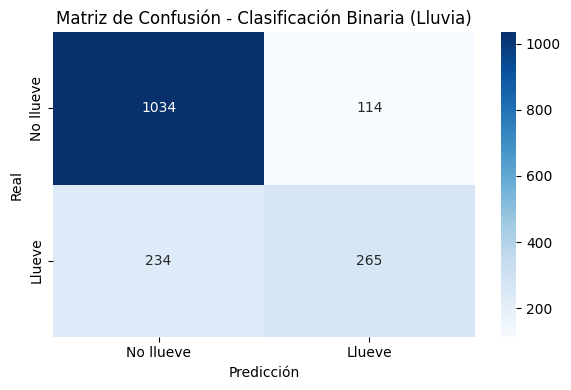

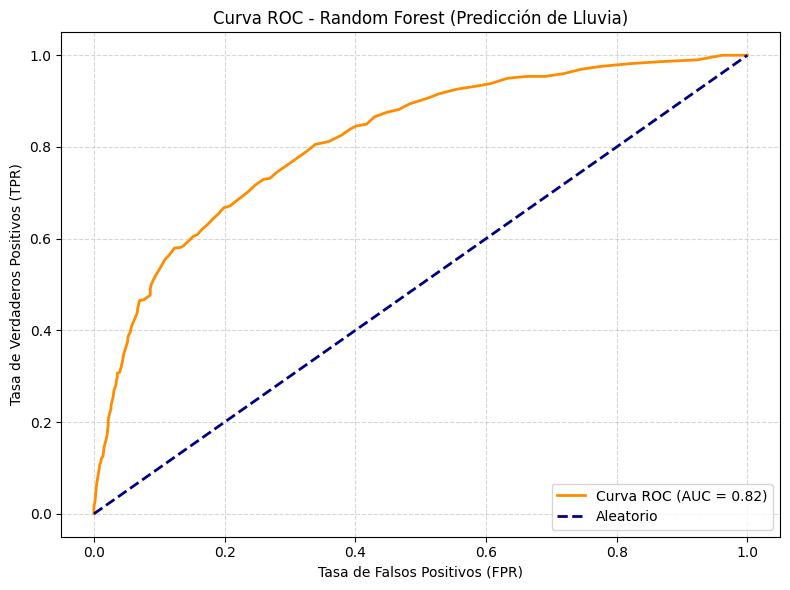

In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, balanced_accuracy_score, roc_auc_score, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una variable binaria: llueve = 1 si prcp > 0, si no 0
df_total['llueve'] = (df_total['prcp (Precipitación en mm)'] > 0).astype(int)

# Definimos variables predictoras y una variable objetivo
X = df_total[[
    'tavg (Temperatura promedio en °C)',
    'tmin (Temperatura mínima en °C)',
    'tmax (Temperatura máxima en °C)',
    'wspd (Velocidad del viento en m/s)',
    'wdir (Dirección del viento en grados)',
    'pres (Presión atmosférica en hPa)'
]]
y = df_total['llueve']

# Dividimos los datos con StratifiedShuffleSplit para respetar el equilibrio de clases
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Entrenamos el modelo
model_rf_bin = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_bin.fit(X_train, y_train)

# Realizamos las predicciones
y_pred_bin = model_rf_bin.predict(X_test)
y_proba_bin = model_rf_bin.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred_bin)
prec = precision_score(y_test, y_pred_bin)
rec = recall_score(y_test, y_pred_bin)
f1 = f1_score(y_test, y_pred_bin)
bal_acc = balanced_accuracy_score(y_test, y_pred_bin)
roc_auc = roc_auc_score(y_test, y_proba_bin)

print("Evaluación del modelo Random Forest para predicción de lluvia:")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Balanced Accuracy: {bal_acc:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred_bin))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred_bin)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No llueve", "Llueve"], yticklabels=["No llueve", "Llueve"])
plt.title("Matriz de Confusión - Clasificación Binaria (Lluvia)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Curva ROC
from sklearn.metrics import roc_curve

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_bin)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest (Predicción de Lluvia)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




Resumen general del rendimiento del modelo:
Métricas globales:

-Accuracy	0.789	El modelo acierta en casi el 79% de los casos totales. Buena tasa de acierto.
-Precision	0.699	Cuando el modelo predice que va a llover, acierta el 70% de las veces.
-Recall (Sensibilidad)	0.531	El modelo detecta el 53% de los días que realmente llueve. Mejora posible.
-F1-Score	0.604	Media armónica entre precisión y recall: buen balance.
-Balanced Accuracy	0.716	Corrige el desbalance de clases (llueve vs no llueve). Aceptable.
-ROC-AUC	0.816	Excelente capacidad para discriminar entre clases (mejor cuanto más cerca de 1).

Informe de Clasificación (por clase):

-El modelo identifica bien los días sin lluvia (recall 0.90).

-Le cuesta más detectar los días de lluvia (solo detecta el 53%).

-Equilibrio aceptable gracias a que la precisión de lluvia es buena (0.70).

Matriz de Confusión:

Interpretación:

-Aciertos (diagonales):

1034 días correctamente predichos como sin lluvia.

265 días correctamente predichos como con lluvia.

-Errores (fuera de diagonal):

114 días falsamente etiquetados como con lluvia (falsos positivos).

234 días de lluvia no detectados (falsos negativos, más críticos).

El modelo es conservador: tiende a predecir más días sin lluvia, por eso se escapan bastantes días de lluvia reales (bajo recall en clase 1).

CURVA ROC:

El modelo Random Forest es capaz de predecir lluvia significativamente mejor que el azar.La Curva ROC obtenida para el modelo Random Forest muestra un AUC de 0.82, lo que indica una alta capacidad de discriminación entre días con y sin lluvia.

Es especialmente útil cuando se quiere maximizar el recall (por ejemplo, para alertas de lluvia), ya que se puede mover el umbral hacia la izquierda.

El área bajo la curva confirma que hay patrones meteorológicos detectables que correlacionan con la lluvia.

Random Forest no solo da buenas métricas como accuracy o F1, sino que también se comporta de forma robusta a distintos umbrales de decisión.

Evaluación del Árbol de Decisión para predicción de lluvia:
Accuracy: 0.702
Precision: 0.508
Recall: 0.541
F1-Score: 0.524
Balanced Accuracy: 0.656
ROC-AUC: 0.656

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      1148
           1       0.51      0.54      0.52       499

    accuracy                           0.70      1647
   macro avg       0.65      0.66      0.65      1647
weighted avg       0.71      0.70      0.70      1647



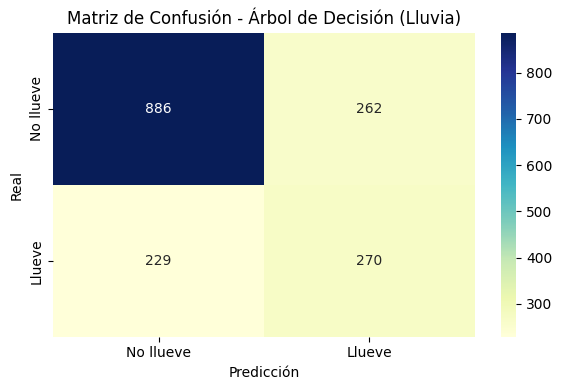

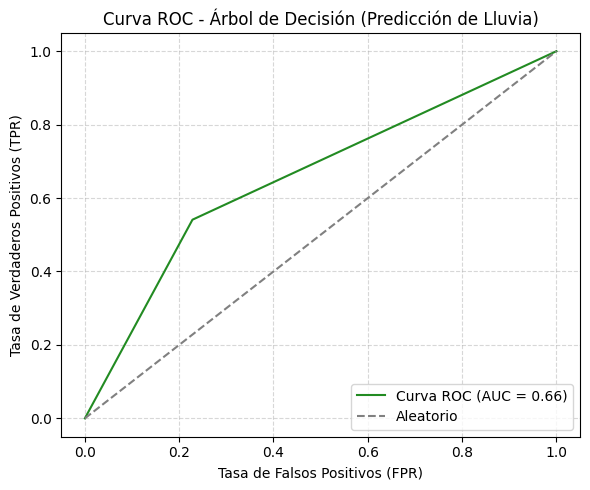

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, balanced_accuracy_score, roc_auc_score, classification_report,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamos el modelo Árbol de Decisión
model_dt_bin = DecisionTreeClassifier(random_state=42)
model_dt_bin.fit(X_train, y_train)

# Realizamos las predicciones
y_pred_dt = model_dt_bin.predict(X_test)
y_proba_dt = model_dt_bin.predict_proba(X_test)[:, 1]

# Métricas
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
bal_acc_dt = balanced_accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print("Evaluación del Árbol de Decisión para predicción de lluvia:")
print(f"Accuracy: {acc_dt:.3f}")
print(f"Precision: {prec_dt:.3f}")
print(f"Recall: {rec_dt:.3f}")
print(f"F1-Score: {f1_dt:.3f}")
print(f"Balanced Accuracy: {bal_acc_dt:.3f}")
print(f"ROC-AUC: {roc_auc_dt:.3f}")
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred_dt))

# Matriz de Confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["No llueve", "Llueve"], yticklabels=["No llueve", "Llueve"])
plt.title("Matriz de Confusión - Árbol de Decisión (Lluvia)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Curva ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, label=f'Curva ROC (AUC = {roc_auc_dt:.2f})', color='forestgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Aleatorio')
plt.title('Curva ROC - Árbol de Decisión (Predicción de Lluvia)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


1. Métricas generales del modelo

Accuracy: 0.702 → El modelo acierta aproximadamente el 70% de las veces.

Precision: 0.588 → De todas las veces que predijo “llueve”, solo el 58.8% eran correctas.

Recall: 0.541 → El modelo detecta correctamente solo el 54.1% de los días que realmente llueve.

F1-Score: 0.524 → Este valor representa un equilibrio entre precision y recall, y no es alto, lo que indica que el modelo tiene limitaciones para detectar lluvia con fiabilidad.

ROC-AUC: 0.656 → La capacidad de discriminar entre días con y sin lluvia es moderada, mejor que aleatoria (0.5) pero inferior a Random Forest (0.816).

2. Matriz de Confusión:
El modelo tiende a confundir muchos días lluviosos como días secos (229 falsos negativos).

También hay un número considerable de falsos positivos (262 veces predice lluvia cuando no llueve).

Es un modelo más conservador que el Random Forest (más cauteloso al predecir lluvia), lo cual puede ser útil en algunas aplicaciones, pero tiene más errores en ambas direcciones.



3. Curva ROC:
El área bajo la curva (AUC = 0.66) indica que el modelo tiene cierta capacidad discriminativa, pero no es fuerte.

La curva se acerca ligeramente al borde superior izquierdo (ideal), pero está lejos de ser óptima.

Comparado con el Random Forest, este modelo tiene una curva ROC menos curvada y por tanto menos eficaz.

